In [37]:
import spacy
import pandas as pd

In [38]:
df = pd.read_csv('train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [39]:
nlp = spacy.load('en_core_web_sm')
def tokenize_delStopwords(text):
    doc = nlp(text)
    tokens_filtered = [token.text for token in doc if len(token.text) <= 3 and not token.is_stop]
    return tokens_filtered

df['tokens_filtered'] = df['text'].apply(tokenize_delStopwords)

In [40]:
all_tokens_without_stopwords = df['tokens_filtered'].explode().tolist()
all_tokens_without_stopwords[1:20]

['La',
 '.',
 "'",
 "'",
 '.',
 '#',
 'got',
 '#',
 '#',
 '#',
 '=',
 '>',
 'Hwy',
 '.',
 '20',
 '-',
 '#',
 '#',
 '#']

In [41]:
corpus = ' '.join(df['text'])
print(corpus[:200])


Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuati


In [42]:
list_of_documents = df['text'].tolist()
list_of_documents

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
 "I'm on top of the hill and I can see a fire in the woods...",
 "There's an emergency evacuation happening now in the building across the street",
 "I'm afraid that the tornado is coming to our area...",
 'Three people died from the heat wave so far',
 'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA 

In [60]:
doc = nlp(corpus)
unique_tokens = set(token.text for token in doc)
print("Nombre de tokens uniques dans le corpus :", len(unique_tokens))

Nombre de tokens uniques dans le corpus : 26708


Ce nombre parait gigantesque

Pour réduire ce nombre de tokens on peut retirer tout les stopwords, retirer toute la ponctuation et les chiffres

In [56]:
from collections import Counter

token_freq = Counter(token.text for token in doc)
singletons = [token for token in token_freq if token_freq[token] == 1]

print("Nombre de tokens uniques qui n'apparaissent qu'une seule fois :", len(singletons))


Nombre de tokens uniques qui n'apparaissent qu'une seule fois : 10


In [61]:
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
doc = doc[0:50]
for token in doc:
    print(p_stemmer.stem(token.text))


our
deed
are
the
reason
of
thi
#
earthquak
may
allah
forgiv
us
all
forest
fire
near
la
rong
sask
.
canada
all
resid
ask
to
'
shelter
in
place
'
are
be
notifi
by
offic
.
no
other
evacu
or
shelter
in
place
order
are
expect
13,000
peopl
receiv


In [67]:
doc = nlp(corpus[:150])

for token in nlp(doc):
    print(token.lemma_)

our
deed
be
the
Reason
of
this
#
earthquake
may
ALLAH
forgive
we
all
Forest
fire
near
La
Ronge
Sask
.
Canada
all
resident
ask
to
'
shelter
in
place
'


non les deux permetent juste de réduire la taille des mots

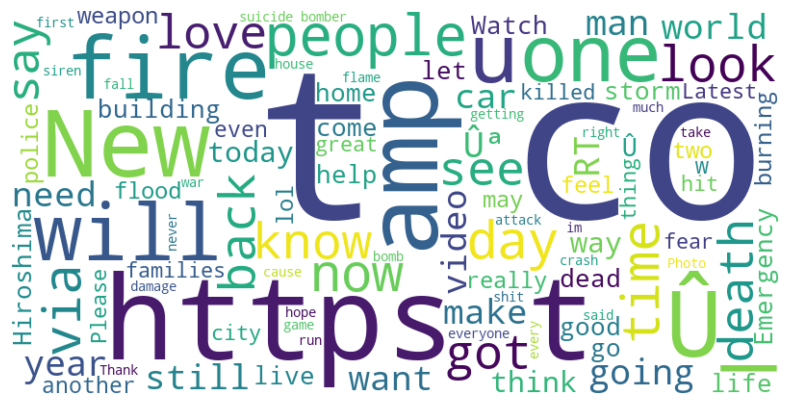

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

corpus = ' '.join(df['text'])
doc = nlp(corpus)

token_freq = Counter(token.text for token in doc)

single_line_text = " ".join([token.replace('\n', ' ') for token in df['text']])

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(single_line_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import re

def preprocess_text(text):
    pass
    corpus = ' '.join(text)
    nlp = spacy.load('en_core_web_sm')  
    texts = nlp(corpus)
    preprocessed_text = [re.sub(r'[^a-zA-Z]', '', token.text.lower()) for token in texts if not token.is_stop]
    
    return preprocessed_text

In [ ]:
preprocess_text(df['text'])

['deeds',
 'reason',
 '',
 'earthquake',
 'allah',
 'forgive',
 'forest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 '',
 'canada',
 'residents',
 'asked',
 '',
 'shelter',
 'place',
 '',
 'notified',
 'officers',
 '',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'expected',
 '',
 'people',
 'receive',
 '',
 'wildfires',
 'evacuation',
 'orders',
 'california',
 '',
 'got',
 'sent',
 'photo',
 'ruby',
 '',
 'alaska',
 'smoke',
 '',
 'wildfires',
 'pours',
 'school',
 '',
 '',
 'rockyfire',
 'update',
 '',
 '',
 'california',
 'hwy',
 '',
 '',
 'closed',
 'directions',
 'lake',
 'county',
 'fire',
 '',
 '',
 'cafire',
 '',
 'wildfires',
 '',
 'flood',
 '',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'streets',
 'manitou',
 '',
 'colorado',
 'springs',
 'areas',
 'hill',
 'fire',
 'woods',
 '',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'street',
 'afraid',
 'tornado',
 'coming',
 'area',
 '',
 'people',
 'died',
 'heat',
 'wave',
 'far',
 'haha